### Transcript analysis

#### Imports:
From our custom module "transcript_classes", we first import the following classes:
* WordEmbeddingVectorizer: defines how to convert processed transcripts into vectors
* Transcript: defines how to process .json files and store associated information during analysis

In [1]:
from transcript_classes import WordEmbeddingVectorizer, Transcript
# https://code.google.com/archive/p/word2vec/
# conda install -c conda-forge gensim
import gensim
# Install huggingface via: conda install -c huggingface transformers
# Also install pytorch via instructions at: https://pytorch.org/get-started/locally/#start-locally
# Also install chardet via: pip install chardet
from transformers import pipeline

/home/morrisreeves/anaconda3/envs/morris_capstone/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


#### Instantiation of pre-trained models and weights:

We instantiate the (static) word embeddings for our WordEmbeddingVectorizer, and the pretrained sentiment classification model.

In [2]:
# Load Google pre-trained Word2Vec word embeddings
gnews_dict = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# Baseline sentiment model: DistilBERT base uncased finetuned SST-2
classifier = pipeline('sentiment-analysis', model = 'distilbert-base-uncased-finetuned-sst-2-english')

In [3]:
gnews_vectorizer = WordEmbeddingVectorizer(embedding_dict = gnews_dict, 
                                           embedding_dim = 300, 
                                           lemmatize = False, remove_stopwords = True, n_token_filter = 10)

#### Instantiation of Transcript object

We pass in the:
1. filepath to the transcript .json file
2. WordEmbeddingVectorizer we defined (which maps lists of strings $\rightarrow$ 2D np array)
3. segment_definition: current options are "default" and "utterance"; this defines how to parse the .json ("default" uses Google's default splitting of the audio into transcript segments; "utterance" concatenates together consecutive words with the same speakerTag as identified by Google's transcription system, so is roughly at the 'turn' level)

In [4]:
TRANSCRIPT_DIRECTORY = '../podcasts-no-audio-13GB/spotify-podcasts-2020/podcasts-transcripts/'
EXAMPLE_JSON_FILEPATH = TRANSCRIPT_DIRECTORY + '4/9/show_49NxrBHUtto19pgLNAJkHY/6hoNS9LR1Lxb4EzMX72kXR.json'

In [7]:
example_transcript = Transcript(EXAMPLE_JSON_FILEPATH, gnews_vectorizer, segment_definition = 'default')
example_transcript.set_segment_vectors(gnews_vectorizer)
example_transcript.set_sentiments(classifier)

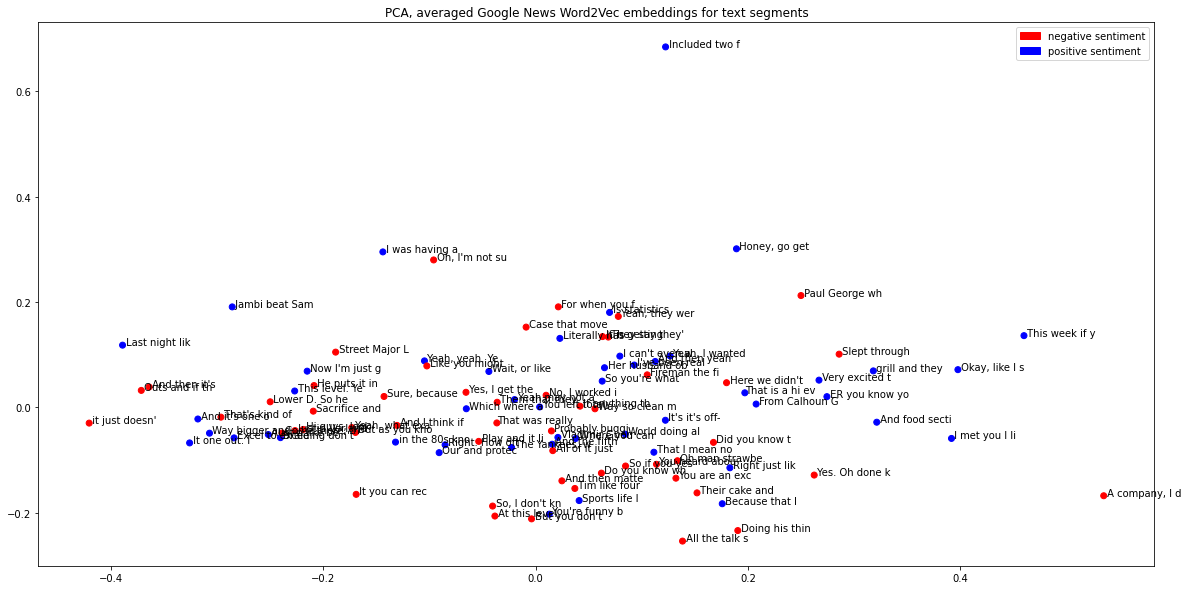

In [9]:
example_transcript.plot_pca(title = "PCA, averaged Google News Word2Vec embeddings for text segments", 
                            n_chars=15)

In [10]:
example_transcript.get_disagreement_cosine("No, I completely disagree with you.", 0.7)

(array([" Doing his thing. There were Michael Jordan was just coming up there weren't there weren't many things to do that. You actually went and played outside. It was yeah, it was a different time. I feel like if people like it now of kids like it now is because they play Big play the score I think so not there's not a lot of or you know their families obsessed with it, you know, I don't know. No, I think that's I think that's true. But I think the biggest problem that baseball has is that they don't have a villain because I think every I mean you have",
        " If anything that is like not slightly Gary, you know that I'm right they keep a dog in this little tiny ass apartment. They never take it for walks because they're alone and can't find a boyfriend. It's not the dog's fault. You're a fucking loser. That is not first of all, are you are you saying? That's what I am. No, you're just laughing because he knows it's true. No, it's just the most ridiculous tape.",
        " You ar

### Appendix / Future exploration:

In [11]:
# https://huggingface.co/bert-base-uncased

from transformers import BertModel, BertTokenizer
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert = BertModel.from_pretrained('bert-base-uncased');

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [12]:
bert_dict = {token: bert.get_input_embeddings()(torch.tensor(id)).detach().numpy()  for 
             token, id in tokenizer.get_vocab().items()}

In [13]:
bert_vectorizer = WordEmbeddingVectorizer(embedding_dict = bert_dict, 
                                          embedding_dim = 768, 
                                          lemmatize = False, remove_stopwords = True, n_token_filter = 10)

In [19]:
example_transcript.segment_vectorizer = bert_vectorizer
example_transcript.set_segment_vectors(bert_vectorizer)

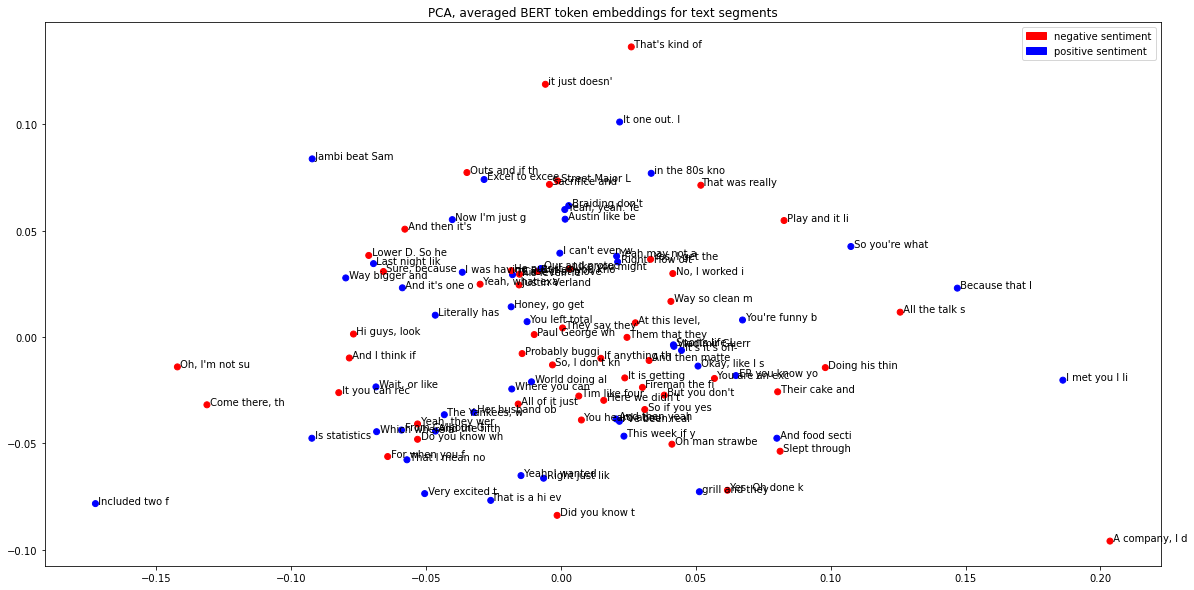

In [20]:
# Plot PCA representation of averaged word embeddings for each continuous speaker segment

example_transcript.plot_pca(title = "PCA, averaged BERT token embeddings for text segments", 
                            n_chars=15)

In [29]:
example_transcript.get_disagreement_cosine("No, I completely disagree with you.", 0.8)

(array(["That is a hi everybody. Welcome to wriggles picks. I'm Sarah Tiana and that other insane voice that you hear is Christopher Brockman from the rich eyes and show and my roommate show just got a lot Dumber. Yeah. No, that was possible. No, I didn't know either but welcome aboard thanks for being here happy to be here in our kitchen. And yeah, I know normally we have done this before.",
        " So if you yes just try and discover the Discovery Channel on your own and watch wriggle and shark after dark which I think he's doing I mean, he's always doing so much stuff. His Instagram has been amazing. It has yeah, you know, you're so bad at looking at Instagram. So if anybody's sent me a message on Instagram just know I will see it in a month. Oh, sorry, that's me. No his stories. He's been around the world.",
        " Very excited to watch it because Acuna was in its core representing. My Atlanta Braves aka the most fun team to watch in the in major league baseball right now. I m